In [31]:
import pandas as pd

# Load the CSV file
file_path = r'ratio_total\2022\hex_cost_components.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows to ensure it's loaded correctly
print(df.head())


   Unnamed: 0         h3_index   n0   n1   n2   n3   n4   n5  waterbody_dist  \
0           0  856590cffffffff   51  863   39  218    0    0             0.0   
1           1  856590cffffffff   51  863   39  218    0    0             0.0   
2           2  8564b2bbfffffff  144  153  674   92  419  334             0.0   
3           3  85414b4ffffffff  225   81  107  269  759    0             0.0   
4           4  854165abfffffff  784  178  712  443    0    0             0.0   

   waterway_dist  ...  Vientiane trucking wind costs  \
0            0.0  ...                            0.0   
1            0.0  ...                            0.0   
2            0.0  ...                            0.0   
3            0.0  ...                            0.0   
4            0.0  ...                            0.0   

   Vientiane LCOH - trucking wind portion  Vientiane pipeline solar costs  \
0                                     0.0                    0.000000e+00   
1                           

In [32]:
df.columns

Index(['Unnamed: 0', 'h3_index', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5',
       'waterbody_dist', 'waterway_dist', 'road_dist', 'hydro', 'index',
       'theo_turbines', 'theo_pv', 'index_right_renamed', 'country',
       'Vientiane road construction costs',
       'Vientiane trucking transport and conversion costs',
       'Vientiane trucking state',
       'Vientiane pipeline transport and conversion costs',
       'Vientiane trucking solar capacity', 'Vientiane trucking wind capacity',
       'Vientiane trucking hydro capacity',
       'Vientiane trucking electrolyzer capacity',
       'Vientiane trucking battery capacity',
       'Vientiane trucking H2 storage capacity',
       'Vientiane trucking production cost',
       'Vientiane pipeline solar capacity', 'Vientiane pipeline wind capacity',
       'Vientiane pipeline hydro capacity',
       'Vientiane pipeline electrolyzer capacity',
       'Vientiane pipeline battery capacity',
       'Vientiane pipeline H2 storage capacity',
     

In [25]:
df["Vientiane trucking total cost"].min()

np.float64(2.660211313296189)

# 1. Heatmap of Cost Components by Region
This heatmap will show variations in different cost components across regions.

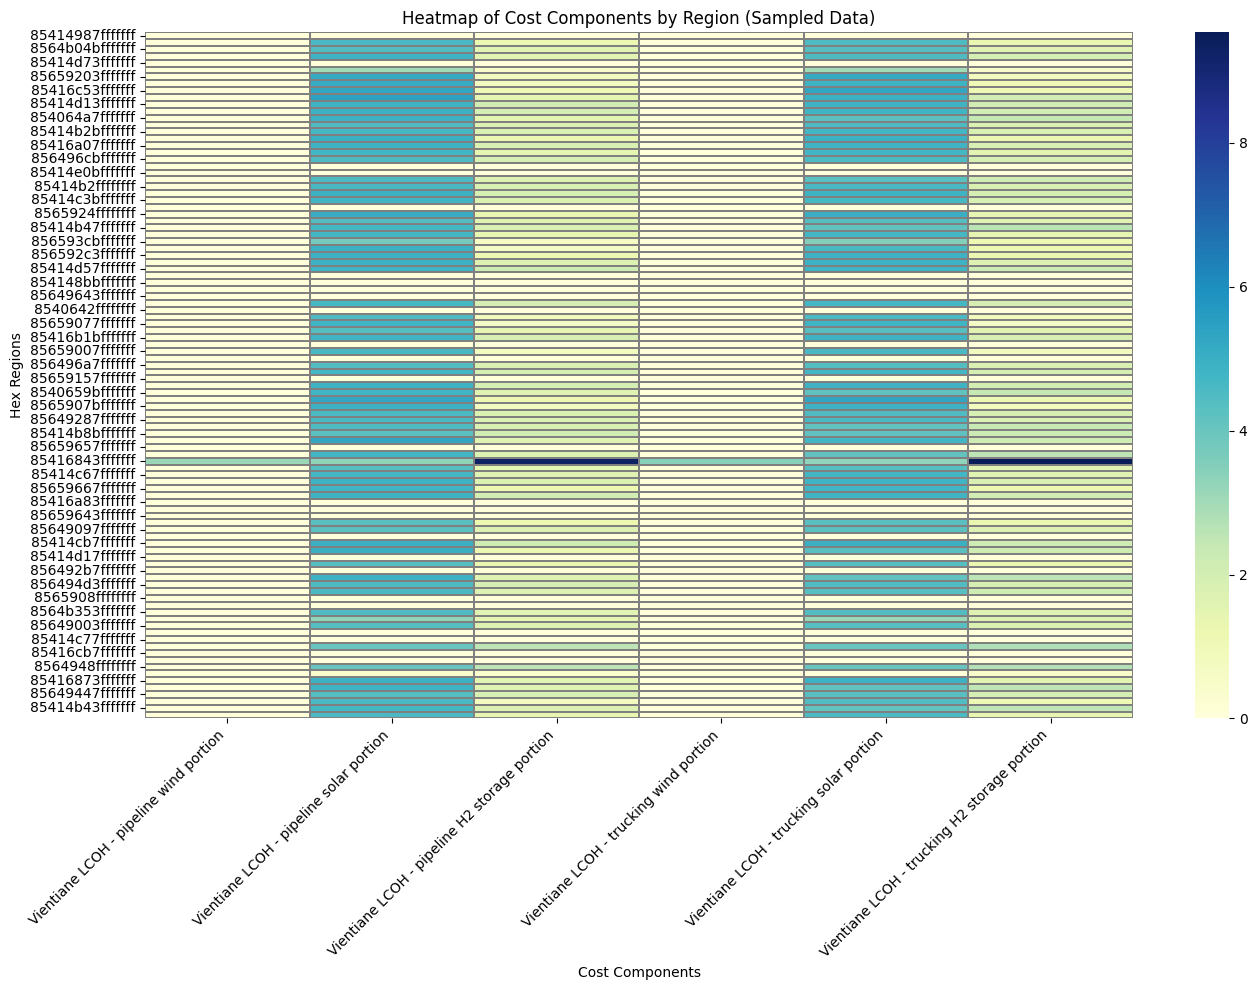

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for the heatmap
cost_columns = [
    'Vientiane LCOH - pipeline wind portion',
    'Vientiane LCOH - pipeline solar portion',
    'Vientiane LCOH - pipeline H2 storage portion',
    'Vientiane LCOH - trucking wind portion',
    'Vientiane LCOH - trucking solar portion',
    'Vientiane LCOH - trucking H2 storage portion',
]

# Sample data to reduce size for better visualization
df_sampled = df.sample(n=100, random_state=42)

# Set the index to h3_index for better alignment in the heatmap
df_sampled.set_index('h3_index', inplace=True)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_sampled[cost_columns], cmap="YlGnBu", linewidths=0.1, linecolor='gray')
plt.title('Heatmap of Cost Components by Region (Sampled Data)')
plt.xlabel('Cost Components')
plt.ylabel('Hex Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Box Plot of Cost Components
This will show the distribution of costs for different components across all regions.

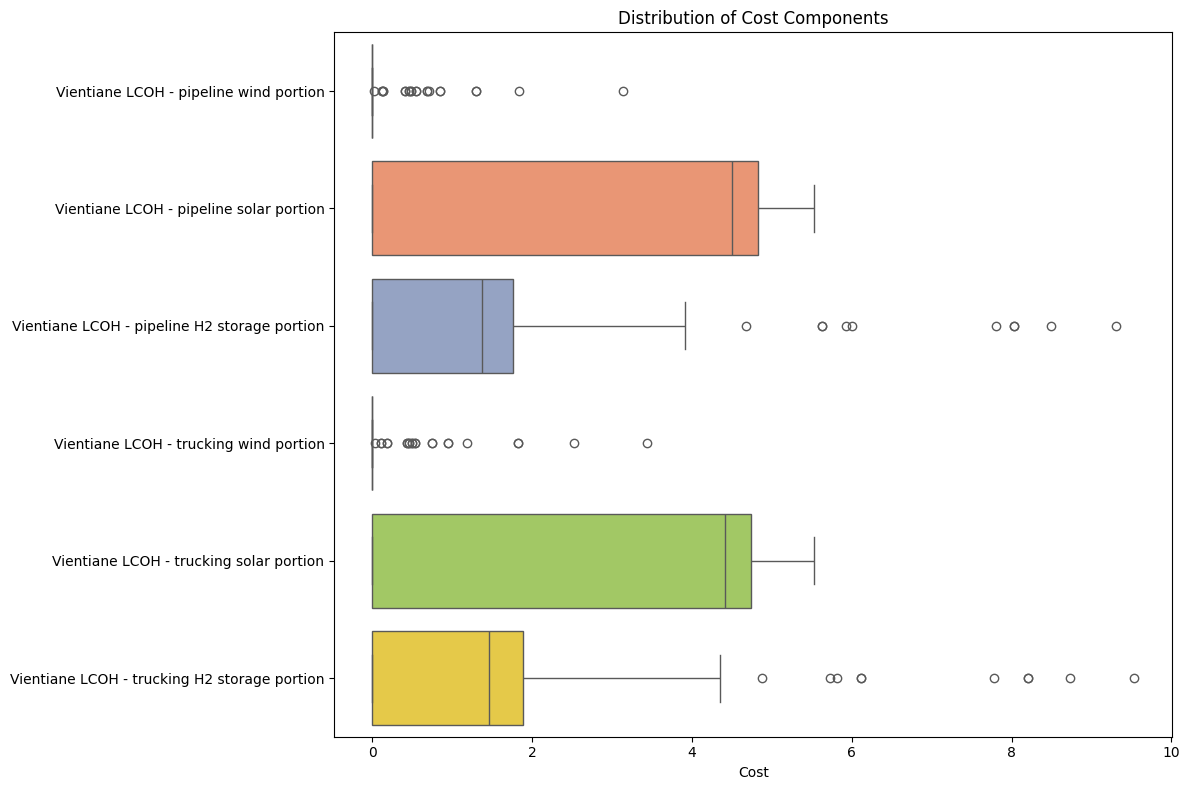

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[cost_columns], orient='h', palette='Set2')
plt.title('Distribution of Cost Components')
plt.xlabel('Cost')
plt.tight_layout()
plt.show()


# 3. Correlation Matrix of Cost Components
This heatmap will show correlations between different cost components.

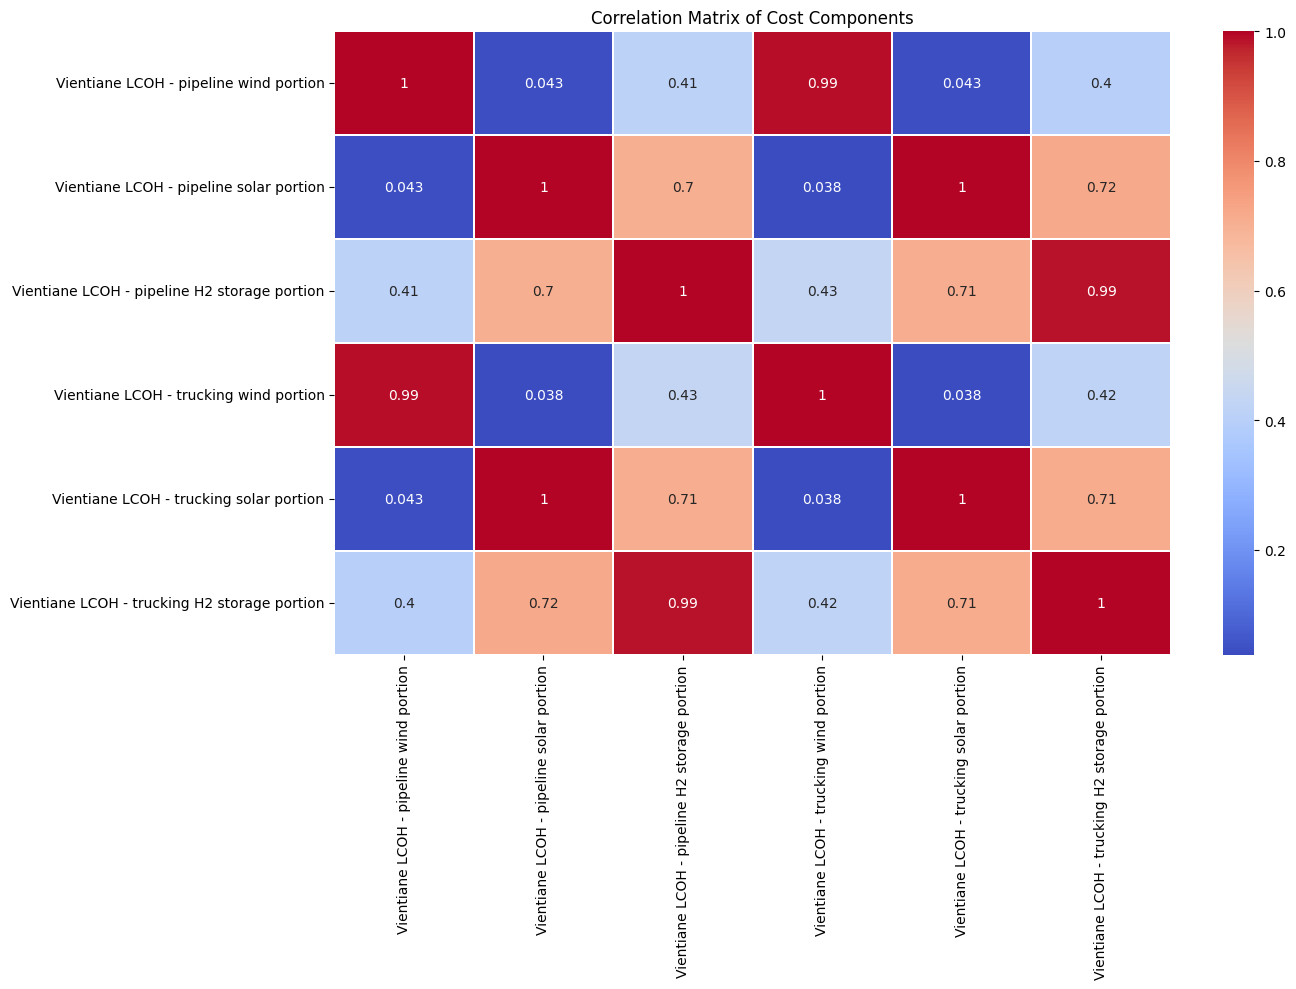

In [8]:
plt.figure(figsize=(14, 10))
corr_matrix = df[cost_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix of Cost Components')
plt.tight_layout()
plt.show()


# 4. Bar Chart of Average Costs by Component
This will compare the average costs associated with different transportation methods and energy sources.

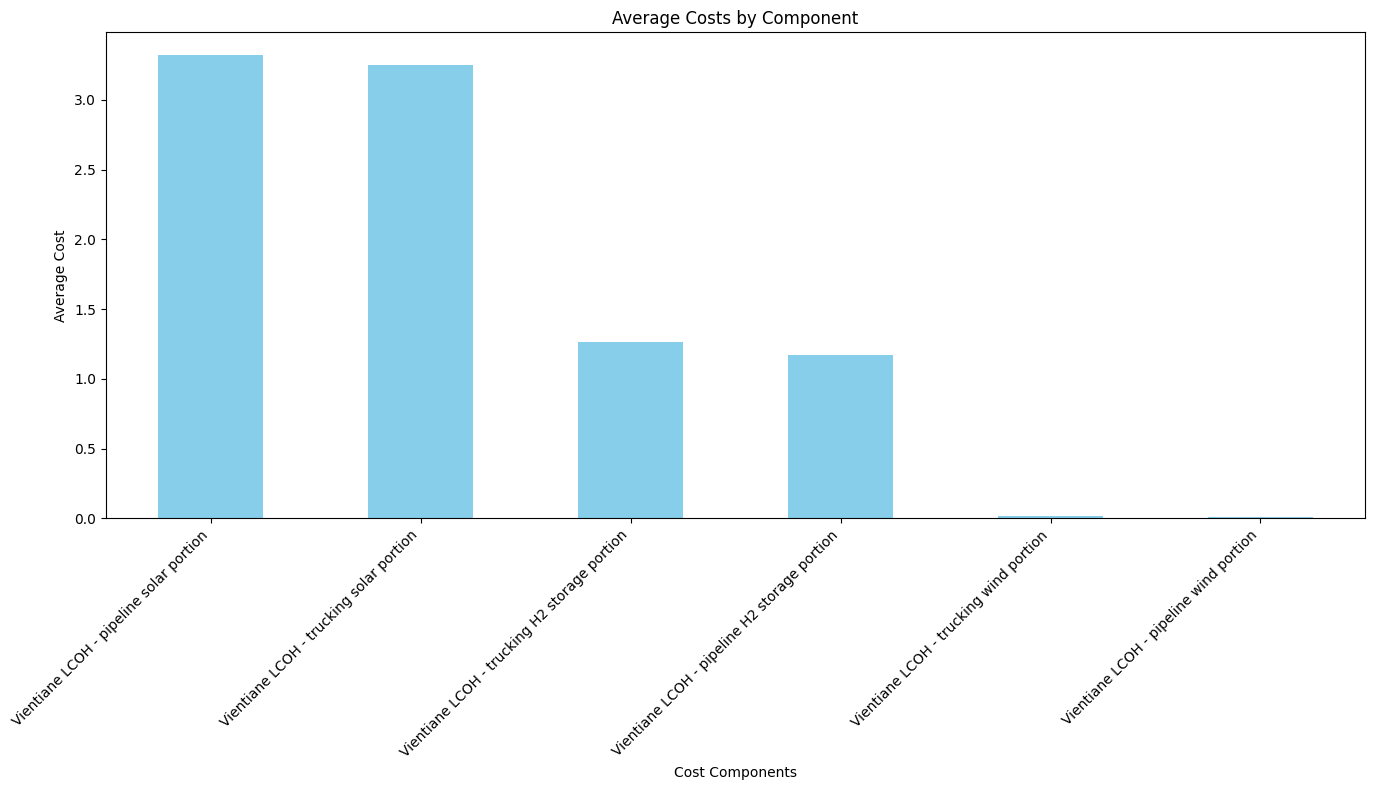

In [9]:
average_costs = df[cost_columns].mean().sort_values(ascending=False)
average_costs.plot(kind='bar', figsize=(14, 8), color='skyblue')
plt.title('Average Costs by Component')
plt.xlabel('Cost Components')
plt.ylabel('Average Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 5. Scatter Plot of Distance vs. Costs
This will examine the relationship between distance to water bodies and various costs.

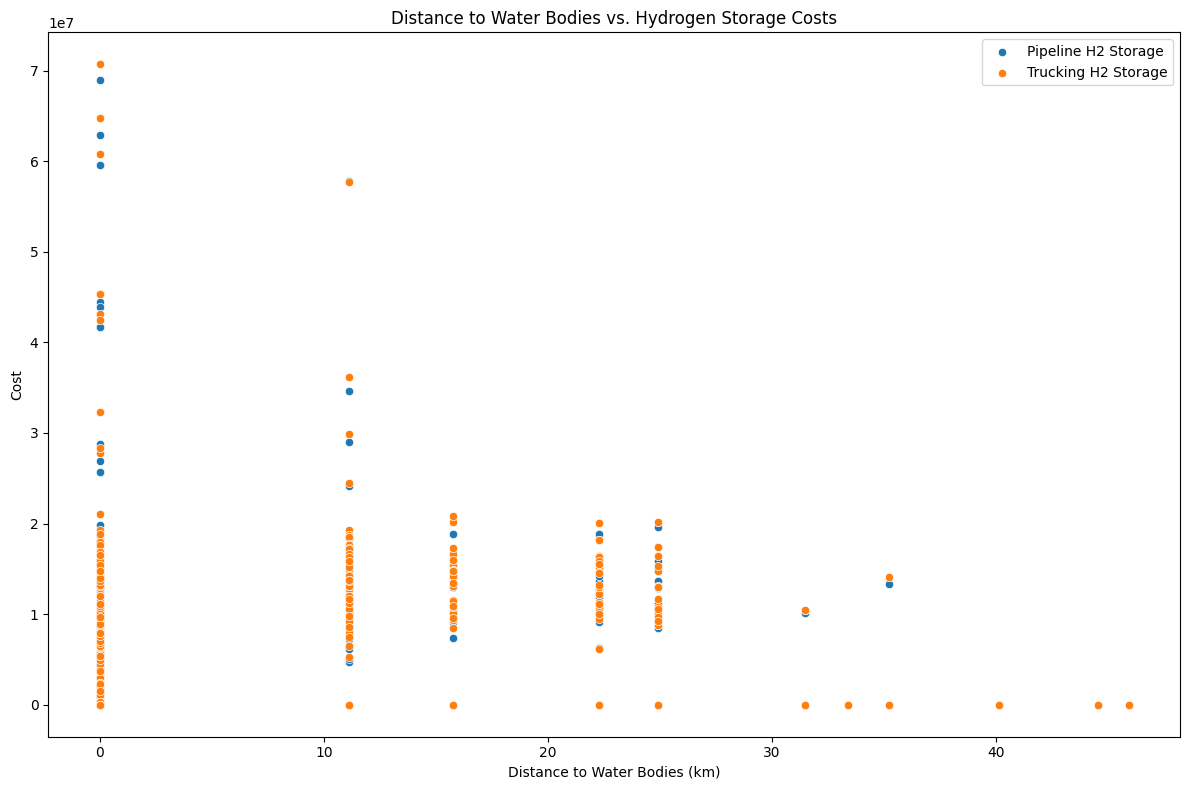

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='waterbody_dist', y='Vientiane pipeline H2 storage costs', data=df, label='Pipeline H2 Storage')
sns.scatterplot(x='waterbody_dist', y='Vientiane trucking H2 storage costs', data=df, label='Trucking H2 Storage')
plt.title('Distance to Water Bodies vs. Hydrogen Storage Costs')
plt.xlabel('Distance to Water Bodies (km)')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()


# 6. Stacked Area Chart of LCOH Components Over Regions
This will show how different components contribute to the overall Levelized Cost of Hydrogen (LCOH) across regions.

In [33]:
df.columns

Index(['h3_index', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'waterbody_dist',
       'waterway_dist', 'road_dist', 'hydro', 'index', 'theo_turbines',
       'theo_pv', 'index_right_renamed', 'country',
       'Vientiane road construction costs',
       'Vientiane trucking transport and conversion costs',
       'Vientiane trucking state',
       'Vientiane pipeline transport and conversion costs',
       'Vientiane trucking solar capacity', 'Vientiane trucking wind capacity',
       'Vientiane trucking hydro capacity',
       'Vientiane trucking electrolyzer capacity',
       'Vientiane trucking battery capacity',
       'Vientiane trucking H2 storage capacity',
       'Vientiane trucking production cost',
       'Vientiane pipeline solar capacity', 'Vientiane pipeline wind capacity',
       'Vientiane pipeline hydro capacity',
       'Vientiane pipeline electrolyzer capacity',
       'Vientiane pipeline battery capacity',
       'Vientiane pipeline H2 storage capacity',
       'Vientiane p

In [43]:
df.geometry.centroid.y

0       2.515738e+06
1       2.515738e+06
2       1.658626e+06
3       2.204053e+06
4       2.315518e+06
            ...     
1131    1.832770e+06
1132    2.507424e+06
1133    1.738751e+06
1134    2.072753e+06
1135    2.094915e+06
Length: 1136, dtype: float64

C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\4006955896.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\4006955896.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['latitude'] = df.geometry.centroid.y


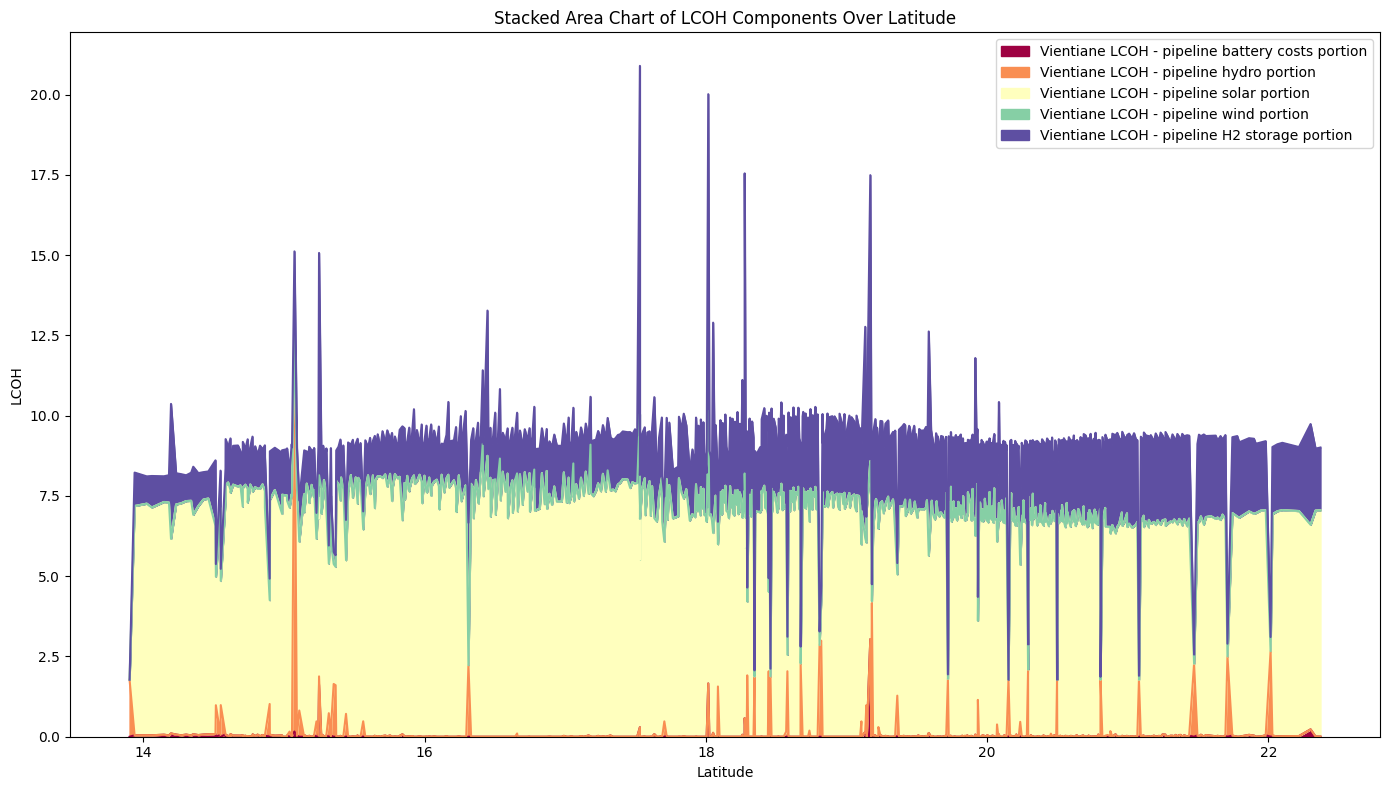

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set the year and axis (choose 'longitude' or 'latitude')
year = 2022  # Update this as needed
axis = 'latitude'  # Choose either 'longitude' or 'latitude'

# Load the GeoJSON file
file_path = f'ratio_total/{year}/hex_cost_components.geojson'  # Update with the correct path if necessary
df = gpd.read_file(file_path)

# Reproject to a projected CRS (e.g., EPSG:3395 or EPSG:3857)
# df = df.to_crs(epsg=4387)

# Define the LCOH components
lcoh_components = [
    'Vientiane LCOH - pipeline battery costs portion',
    'Vientiane LCOH - pipeline hydro portion',
    'Vientiane LCOH - pipeline solar portion',
    'Vientiane LCOH - pipeline wind portion',
    'Vientiane LCOH - pipeline H2 storage portion',
    # 'Vientiane LCOH - trucking wind portion',
    # 'Vientiane LCOH - trucking solar portion',
    # 'Vientiane LCOH - trucking H2 storage portion'
]

# Extract longitude and latitude from the geometry
df['longitude'] = df.geometry.centroid.x
df['latitude'] = df.geometry.centroid.y

# Filter out rows where 'Lowest cost' is NaN
df_filtered = df.dropna(subset=['Vientiane lowest cost']).copy() # Vientiane lowest cost

# Select the axis to plot on the x-axis (longitude or latitude)
df_lcoh = df_filtered[lcoh_components + [axis]].copy()

# Sort the DataFrame by the chosen axis
df_lcoh = df_lcoh.sort_values(axis)

# Set the chosen axis as the index
df_lcoh.set_index(axis, inplace=True)

# Plot the area chart
df_lcoh.plot(kind='area', stacked=True, figsize=(14, 8), colormap='Spectral')
plt.title(f'Stacked Area Chart of LCOH Components Over {axis.capitalize()}')
plt.xlabel(f'{axis.capitalize()}')
plt.ylabel('LCOH')
plt.tight_layout()
plt.show()


C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['latitude'] = df.geometry.centroid.y


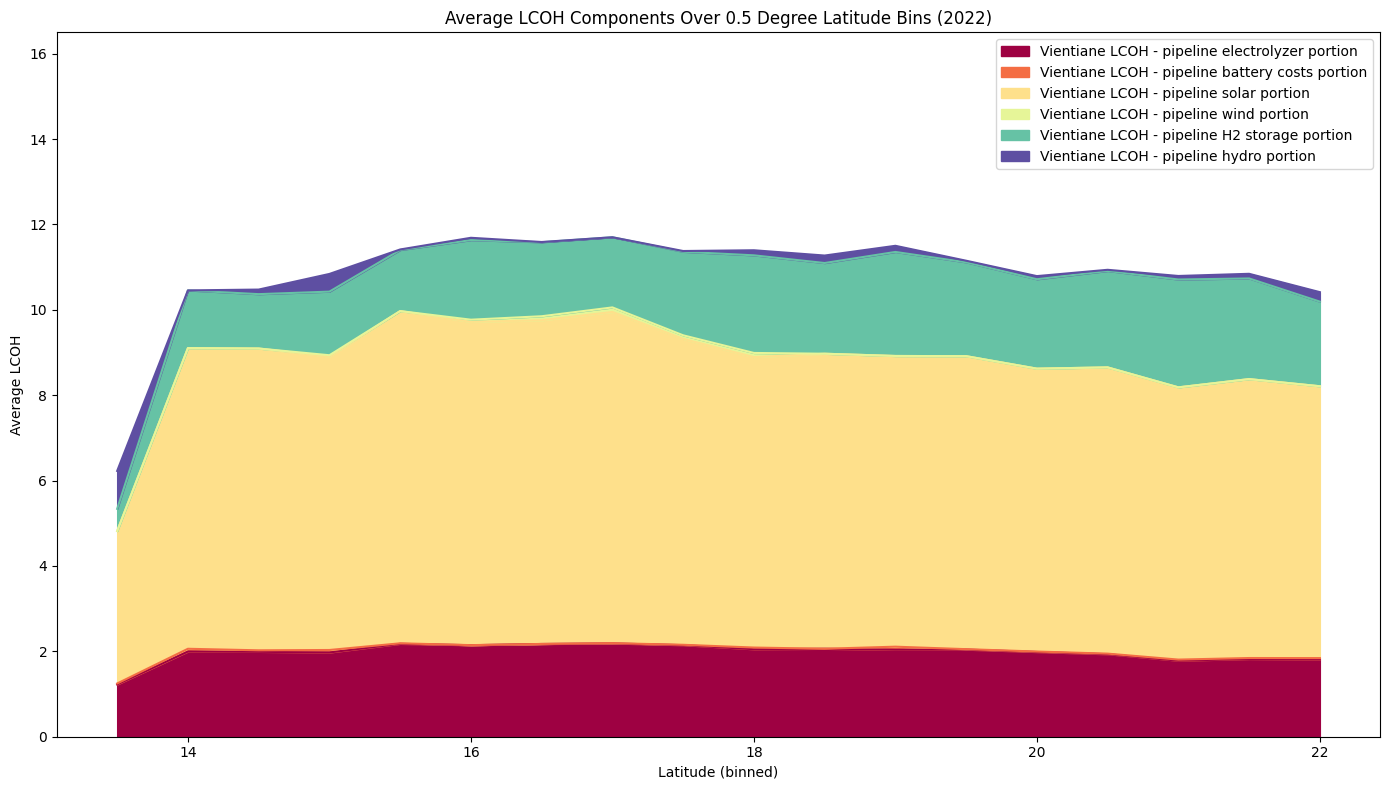

C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['latitude'] = df.geometry.centroid.y


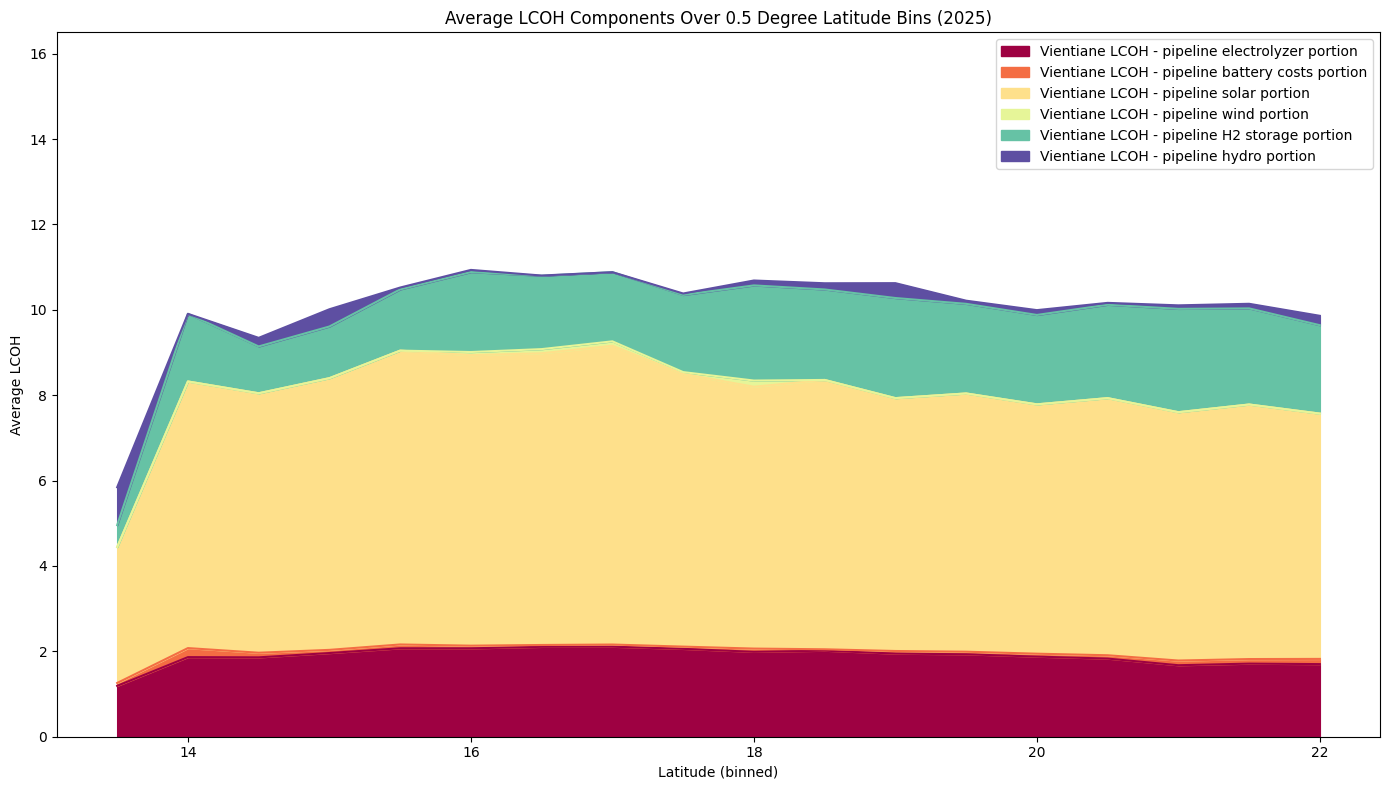

C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['latitude'] = df.geometry.centroid.y


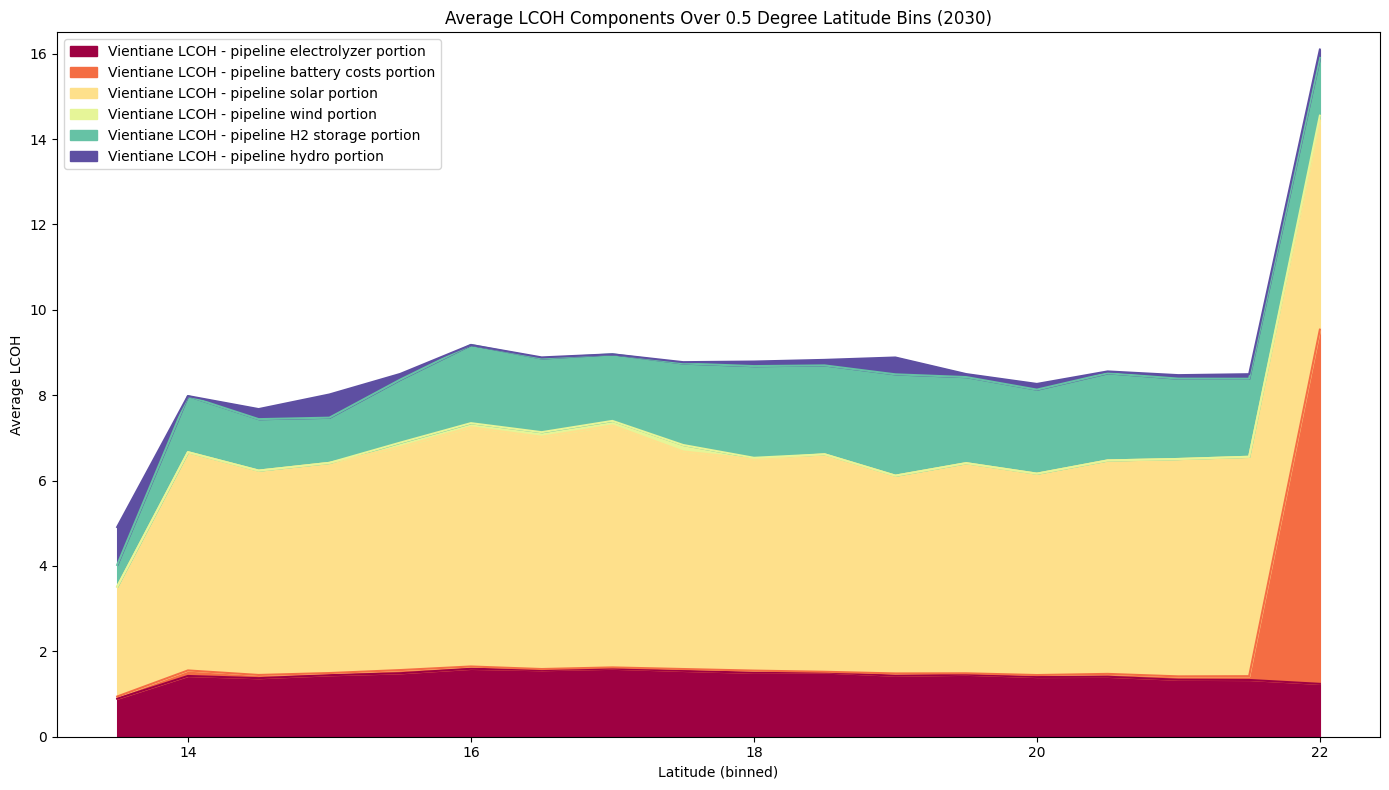

C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\502215727.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['latitude'] = df.geometry.centroid.y


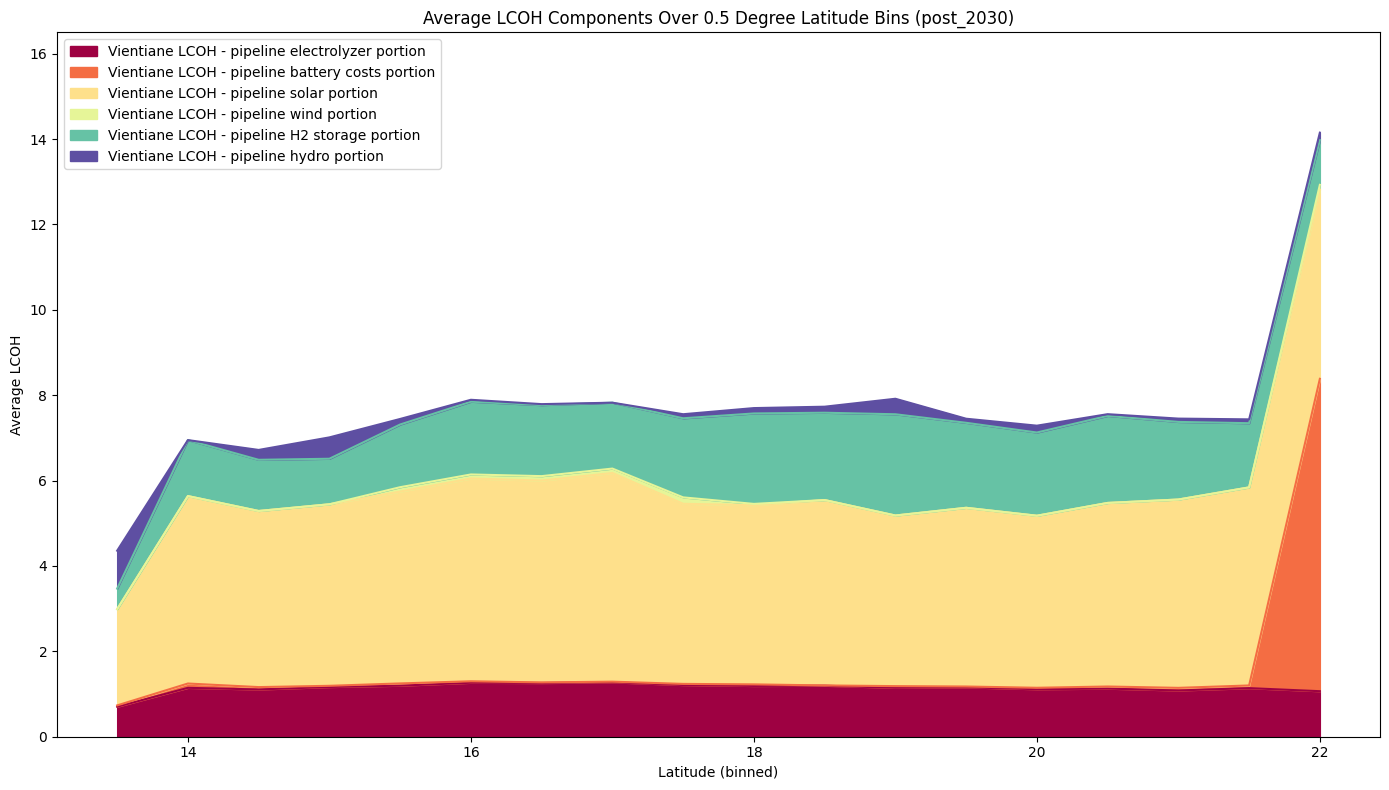

In [72]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# List of years you want to process
years = [2022, 2025, 2030, 'post_2030']  # Add or modify years as needed
axis = 'latitude'  # Choose either 'longitude' or 'latitude'

# Define the LCOH components
lcoh_components = [
    'Vientiane LCOH - pipeline electrolyzer portion',
    'Vientiane LCOH - pipeline battery costs portion',
    'Vientiane LCOH - pipeline solar portion',
    'Vientiane LCOH - pipeline wind portion',
    'Vientiane LCOH - pipeline H2 storage portion',
    'Vientiane LCOH - pipeline hydro portion',
]

# Define the y-axis limits
y_min = 0  # Set the desired minimum value for the y-axis
y_max = 16.5  # Set the desired maximum value for the y-axis

# Loop through each year and process the data
for year in years:
    # Load the GeoJSON file for the current year
    file_path = f'ratio_total/{year}/hex_cost_components.geojson'  # Update with the correct path if necessary
    df = gpd.read_file(file_path)

    # Extract longitude and latitude from the geometry
    df['longitude'] = df.geometry.centroid.x
    df['latitude'] = df.geometry.centroid.y

    # Filter out rows where 'Vientiane lowest cost' is NaN
    df_filtered = df.dropna(subset=['Vientiane lowest cost']).copy()

    # Bin the latitude values into 0.5 degree intervals
    df_filtered['lat_bin'] = np.floor(df_filtered[axis] * 2) / 2

    # Group by the latitude bins and calculate the mean for each group
    df_grouped = df_filtered.groupby('lat_bin')[lcoh_components].mean()

    # Plot the area chart with specified y-axis limits
    ax = df_grouped.plot(kind='area', stacked=True, figsize=(14, 8), colormap='Spectral')
    ax.set_ylim(y_min, y_max)
    plt.title(f'Average LCOH Components Over 0.5 Degree {axis.capitalize()} Bins ({year})')
    plt.xlabel(f'{axis.capitalize()} (binned)')
    plt.ylabel('Average LCOH')
    plt.tight_layout()
    plt.show()


C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\2354992915.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\2354992915.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['latitude'] = df.geometry.centroid.y
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\2354992915.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['longitude'] = df.geometry.centroid.x
C:\Users\lukas\AppData\Local\Temp\ipykernel_40828\2354992915.py:20: UserWarning: Geometry is in a geographic CRS.

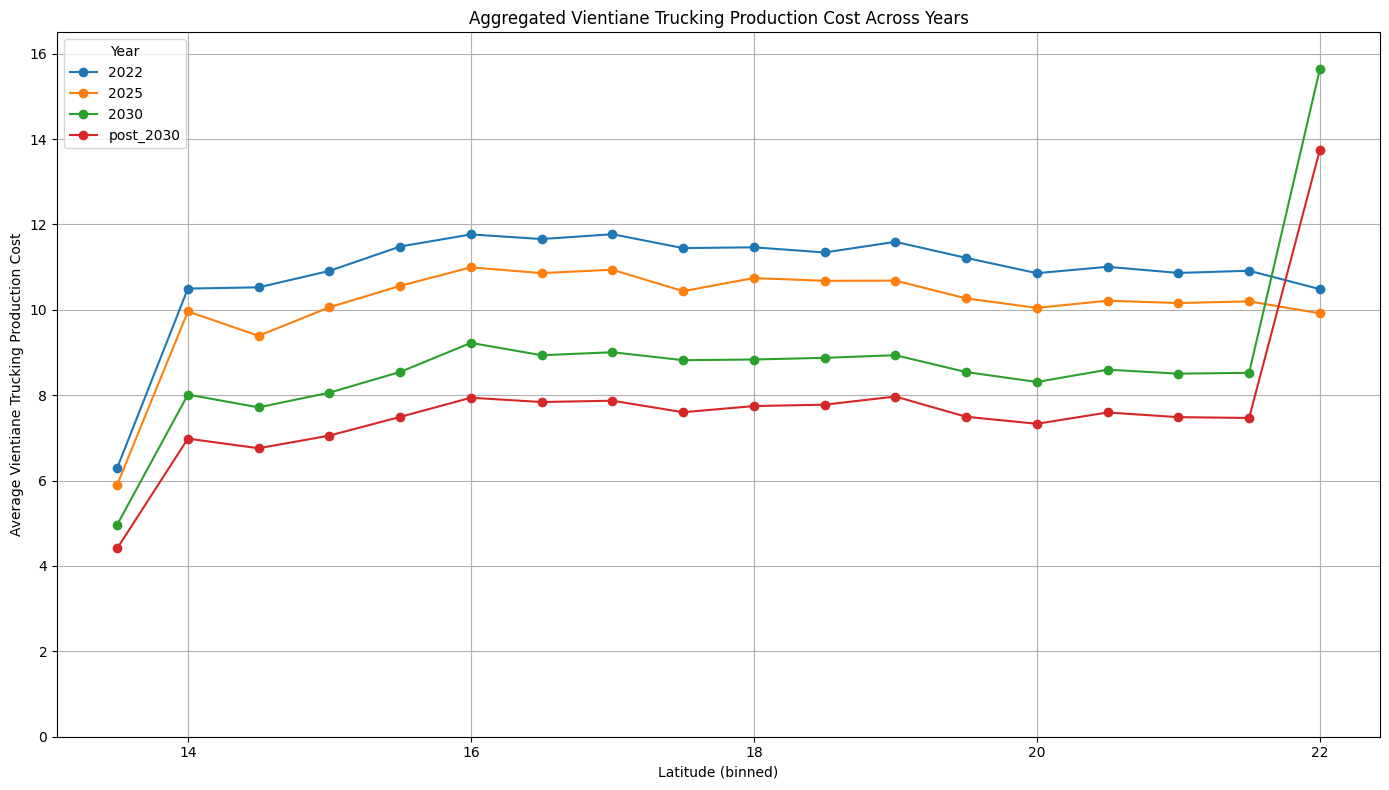

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# List of years you want to process
years = [2022, 2025, 2030, 'post_2030']  # Add or modify years as needed
axis = 'latitude'  # Choose either 'longitude' or 'latitude'

# Initialize a dictionary to hold the data for each year
yearly_data = {}

# Loop through each year and process the data
for year in years:
    # Load the GeoJSON file for the current year
    file_path = f'ratio_total/{year}/hex_cost_components.geojson'  # Update with the correct path if necessary
    df = gpd.read_file(file_path)

    # Extract longitude and latitude from the geometry
    df['longitude'] = df.geometry.centroid.x
    df['latitude'] = df.geometry.centroid.y

    # Filter out rows where 'Vientiane lowest cost' is NaN
    df_filtered = df.dropna(subset=['Vientiane trucking production cost']).copy()

    # Bin the latitude values into 0.5 degree intervals
    df_filtered['lat_bin'] = np.floor(df_filtered[axis] * 2) / 2

    # Group by the latitude bins and calculate the mean for each group
    df_grouped = df_filtered.groupby('lat_bin')['Vientiane trucking production cost'].mean()

    # Store the processed data
    yearly_data[year] = df_grouped

# Plotting the aggregated LCOH for each year on the same plot
plt.figure(figsize=(14, 8))

# Loop through each year to plot the data
for year, data in yearly_data.items():
    plt.plot(data.index, data.values, label=f'{year}', marker='o')

# Customize the plot
plt.ylim(0, 16.5)  # Set y-axis limits if needed
plt.title('Aggregated Vientiane Trucking Production Cost Across Years')
plt.xlabel(f'{axis.capitalize()} (binned)')
plt.ylabel('Average Vientiane Trucking Production Cost')
plt.legend(title='Year')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# 8. Radar Chart for Cost Component Comparison by Region
This radar chart will compare how different regions perform across various cost components.

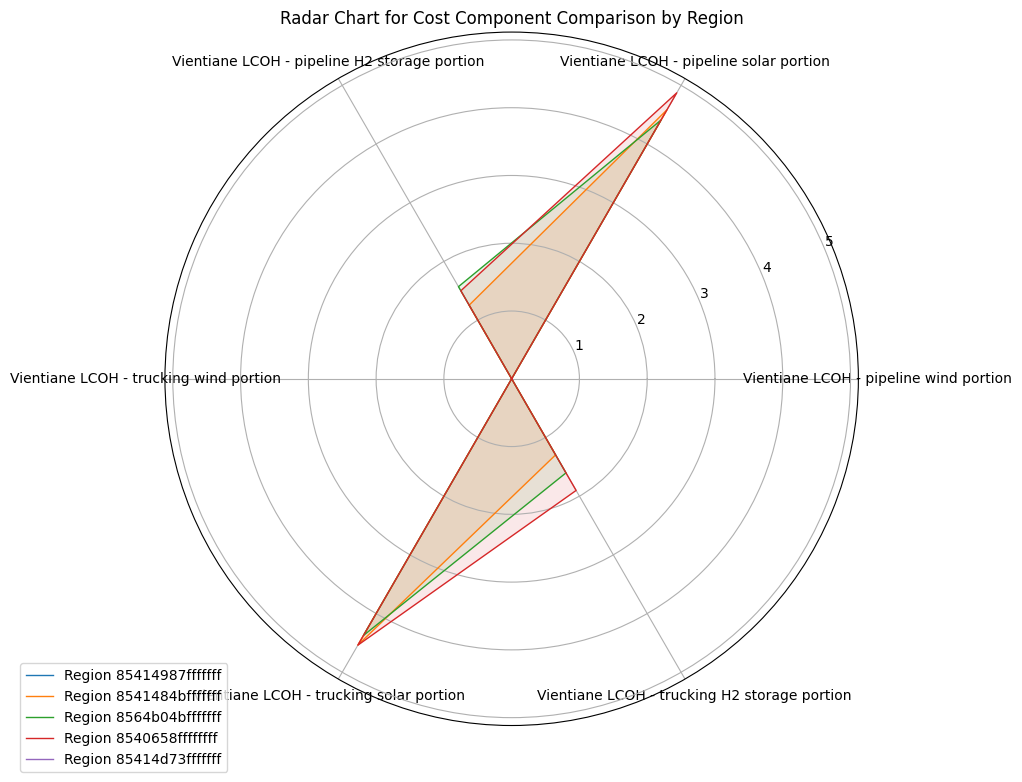

In [12]:
from math import pi
import numpy as np

# Sample data for radar chart
df_radar = df.sample(n=5, random_state=42).set_index('h3_index')[cost_columns]

# Number of variables we're plotting.
categories = list(df_radar.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

for i, row in df_radar.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Region {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
plt.title('Radar Chart for Cost Component Comparison by Region')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.show()


# 1. North-South and West-East Analysis of Costs


In [14]:
import geopandas as gpd

# Load the GeoJSON file
file_path = 'ratio_total/2022/hex_cost_components.geojson'  # Update with the correct path if necessary
gdf = gpd.read_file(file_path)

# Compute the centroids of the geometries
gdf['centroid'] = gdf.geometry.centroid

# Extract latitude and longitude from centroid
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

# Display the first few rows to ensure it's loaded correctly
print(gdf.head())


          h3_index   n0   n1   n2   n3   n4   n5  waterbody_dist  \
0  856590cffffffff   51  863   39  218    0    0             0.0   
1  856590cffffffff   51  863   39  218    0    0             0.0   
2  8564b2bbfffffff  144  153  674   92  419  334             0.0   
3  85414b4ffffffff  225   81  107  269  759    0             0.0   
4  854165abfffffff  784  178  712  443    0    0             0.0   

   waterway_dist  road_dist  ...  Vientiane trucking wind costs  \
0            0.0        0.0  ...                            0.0   
1            0.0        0.0  ...                            0.0   
2            0.0        0.0  ...                            0.0   
3            0.0        0.0  ...                            0.0   
4            0.0        0.0  ...                            0.0   

   Vientiane LCOH - trucking wind portion  Vientiane pipeline solar costs  \
0                                     0.0                    0.000000e+00   
1                                 

C:\Users\lukas\AppData\Local\Temp\ipykernel_20292\1779266516.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


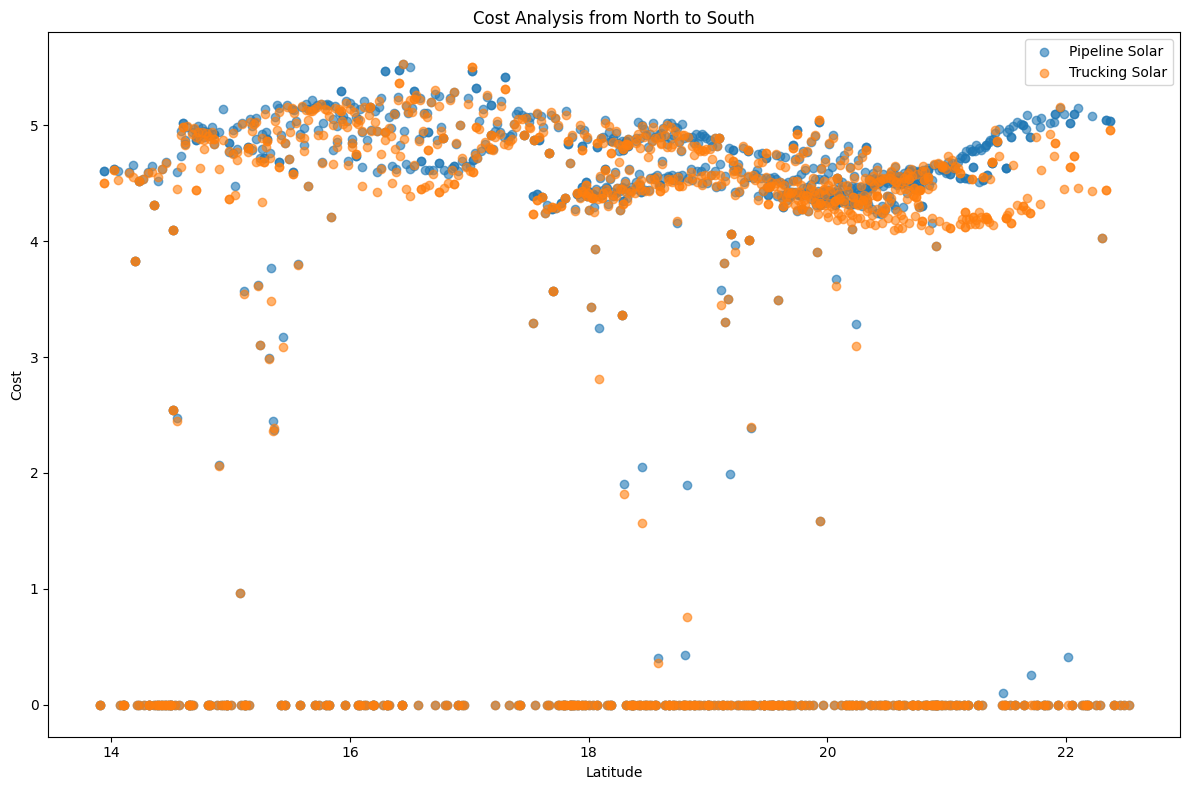

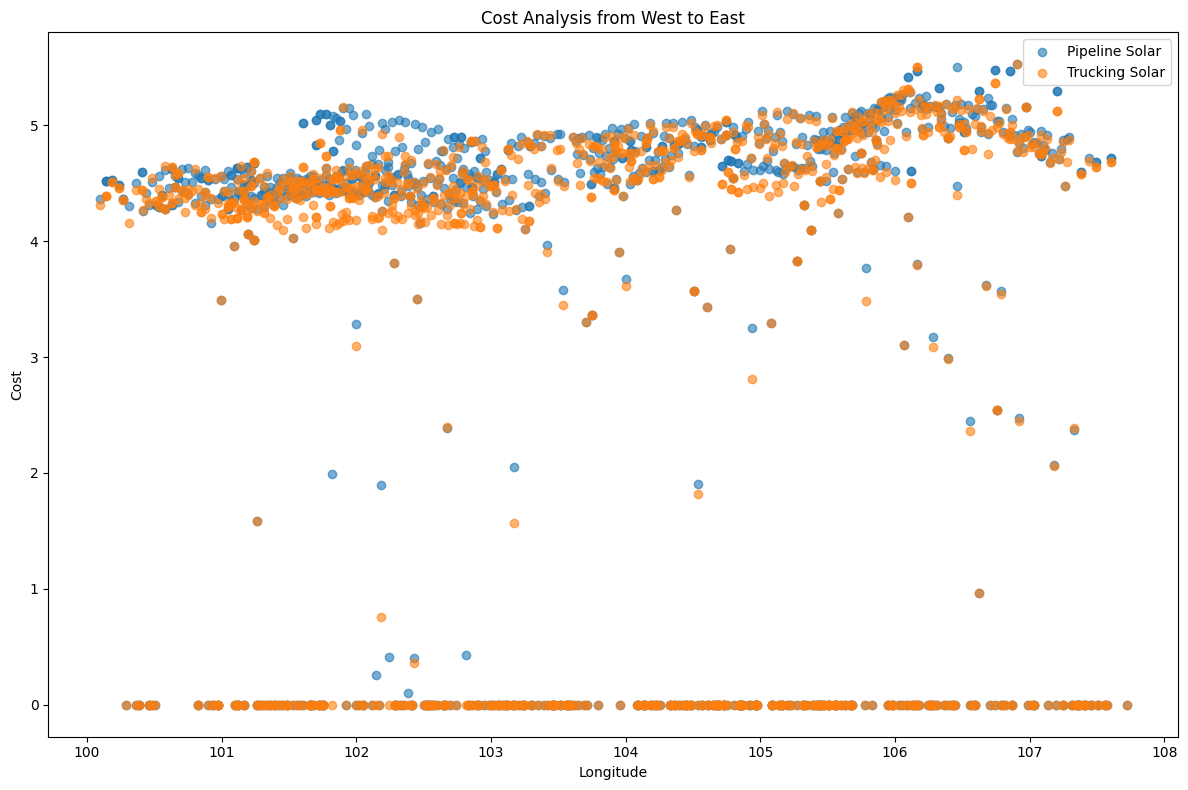

In [15]:
import matplotlib.pyplot as plt

# Scatter plot of costs by latitude (north-south)
plt.figure(figsize=(12, 8))
plt.scatter(gdf['latitude'], gdf['Vientiane LCOH - pipeline solar portion'], label='Pipeline Solar', alpha=0.6)
plt.scatter(gdf['latitude'], gdf['Vientiane LCOH - trucking solar portion'], label='Trucking Solar', alpha=0.6)
plt.title('Cost Analysis from North to South')
plt.xlabel('Latitude')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot of costs by longitude (west-east)
plt.figure(figsize=(12, 8))
plt.scatter(gdf['longitude'], gdf['Vientiane LCOH - pipeline solar portion'], label='Pipeline Solar', alpha=0.6)
plt.scatter(gdf['longitude'], gdf['Vientiane LCOH - trucking solar portion'], label='Trucking Solar', alpha=0.6)
plt.title('Cost Analysis from West to East')
plt.xlabel('Longitude')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\lukas\AppData\Local\Temp\ipykernel_20292\3625211331.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


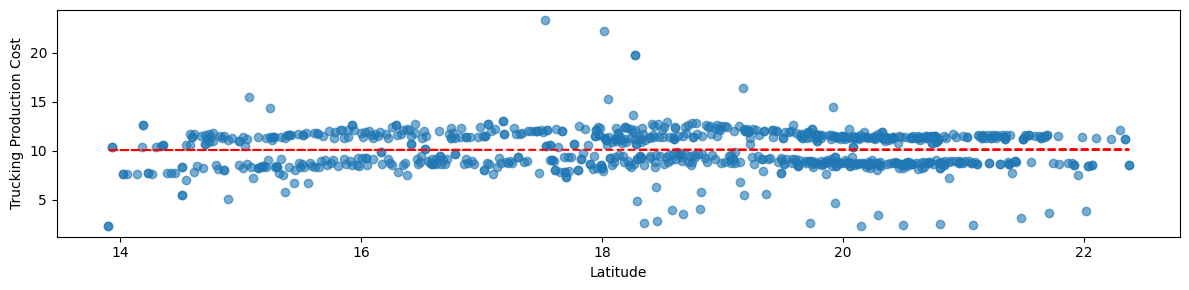

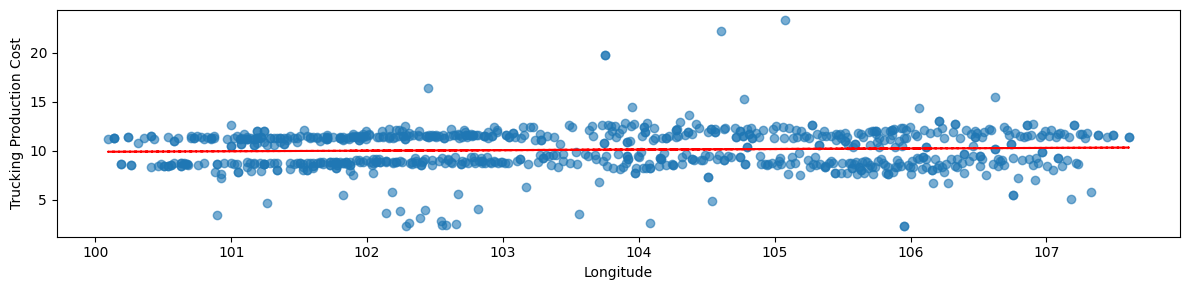

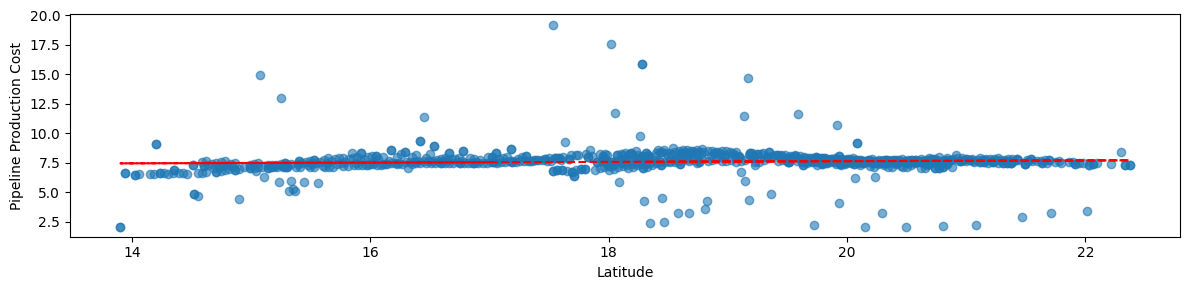

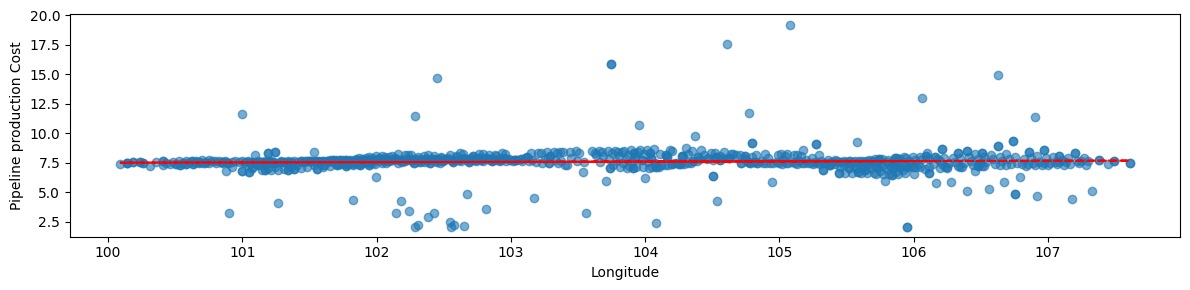

In [30]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the GeoJSON file
file_path = 'ratio_total/2022/hex_cost_components.geojson'  # Update with the correct path if necessary
gdf = gpd.read_file(file_path)

# Compute the centroids of the geometries
gdf['centroid'] = gdf.geometry.centroid

# Extract latitude and longitude from centroid
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

# Filter out rows with 0 or null values in relevant columns
filtered_gdf = gdf[
    (gdf[['Vientiane trucking production cost', 'Vientiane pipeline production cost']] != 0).all(axis=1) &
    gdf[['Vientiane trucking production cost', 'Vientiane pipeline production cost']].notnull().all(axis=1) #&
    # (gdf['Vientiane pipeline hydro capacity'] == 0) &
    # (gdf['Vientiane trucking hydro capacity'] == 0)
]

# Function to plot scatter with regression line
def scatter_with_regression(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(12, 3))
    plt.scatter(x, y, alpha=0.6)

    # Fit linear regression
    model = LinearRegression()
    x_reshaped = np.array(x).reshape(-1, 1)
    model.fit(x_reshaped, y)
    trendline = model.predict(x_reshaped)
    
    # Plot trendline
    plt.plot(x, trendline, color='red', linestyle='dashed')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.title(title)
    plt.tight_layout()
    plt.show()

# Pipeline Solar LCOH vs Latitude
scatter_with_regression(filtered_gdf['latitude'], filtered_gdf['Vientiane trucking production cost'], 
                        'Latitude', 'Trucking Production Cost', 'XX')

# Pipeline Solar LCOH vs Longitude
scatter_with_regression(filtered_gdf['longitude'], filtered_gdf['Vientiane trucking production cost'], 
                        'Longitude', 'Trucking Production Cost', 'XX')

# Trucking Solar LCOH vs Latitude
scatter_with_regression(filtered_gdf['latitude'], filtered_gdf['Vientiane pipeline production cost'], 
                        'Latitude', 'Pipeline Production Cost', 'XX')

# Trucking Solar LCOH vs Longitude
scatter_with_regression(filtered_gdf['longitude'], filtered_gdf['Vientiane pipeline production cost'], 
                        'Longitude', 'Pipeline production Cost', 'XX')


C:\Users\lukas\AppData\Local\Temp\ipykernel_20292\2683777415.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


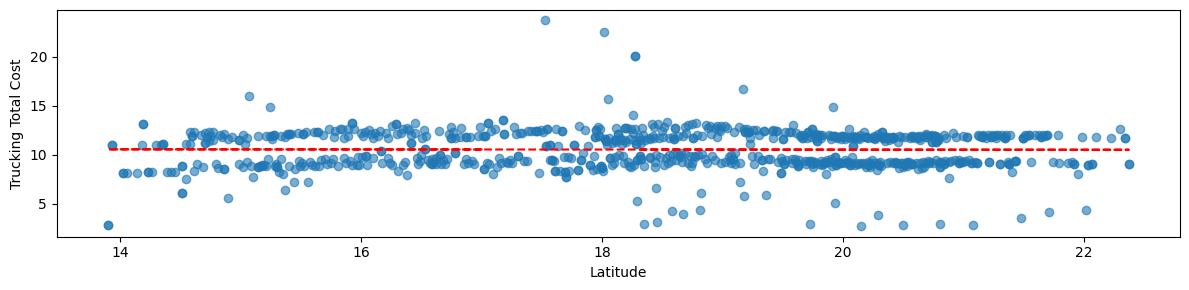

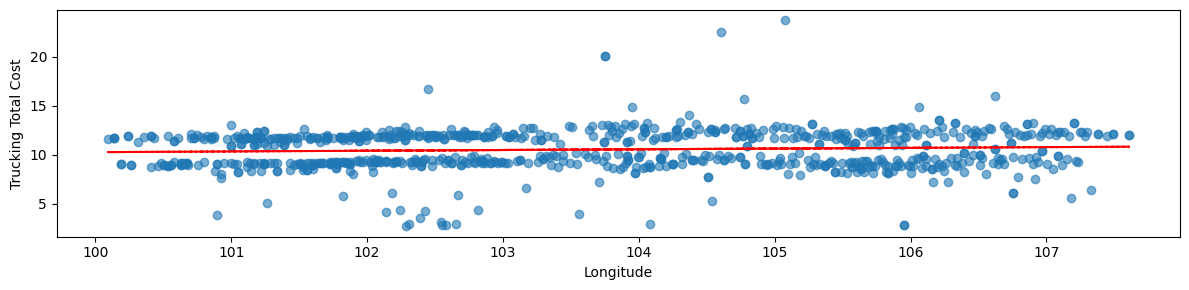

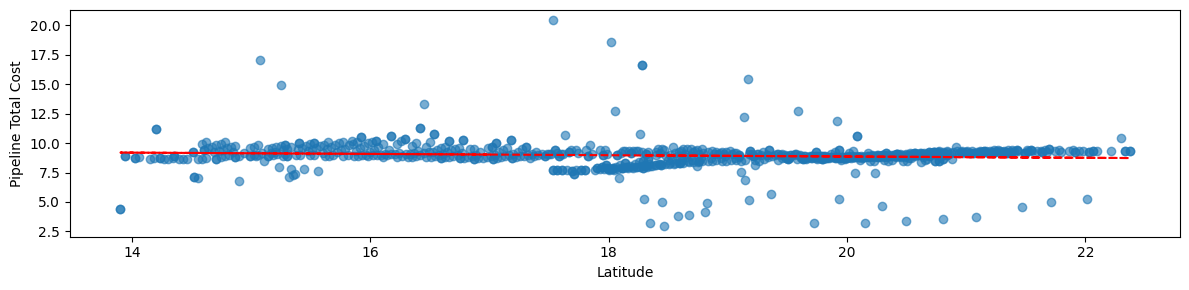

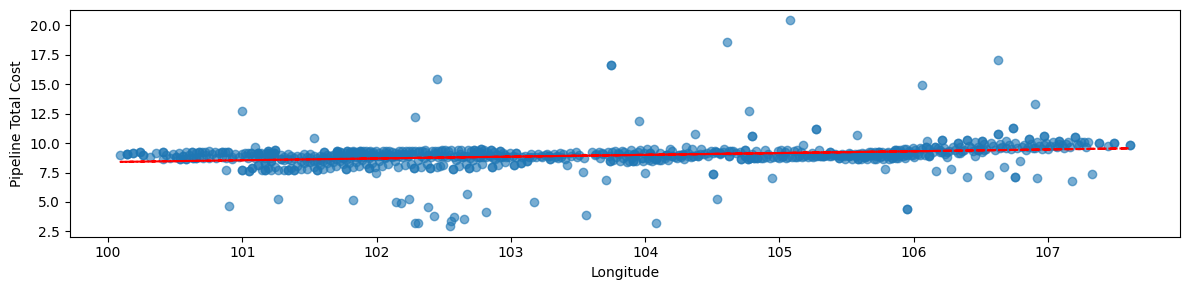

In [29]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the GeoJSON file
file_path = 'ratio_total/2022/hex_cost_components.geojson'  # Update with the correct path if necessary
gdf = gpd.read_file(file_path)

# Compute the centroids of the geometries
gdf['centroid'] = gdf.geometry.centroid

# Extract latitude and longitude from centroid
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

# Filter out rows with 0 or null values in relevant columns
filtered_gdf = gdf[
    (gdf[['Vientiane trucking total cost', 'Vientiane pipeline total cost']] != 0).all(axis=1) &
    gdf[['Vientiane trucking total cost', 'Vientiane pipeline total cost']].notnull().all(axis=1) #&
    # (gdf['Vientiane pipeline hydro capacity'] == 0) &
    # (gdf['Vientiane trucking hydro capacity'] == 0)
]

# Function to plot scatter with regression line
def scatter_with_regression(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(12, 3))
    plt.scatter(x, y, alpha=0.6)

    # Fit linear regression
    model = LinearRegression()
    x_reshaped = np.array(x).reshape(-1, 1)
    model.fit(x_reshaped, y)
    trendline = model.predict(x_reshaped)
    
    # Plot trendline
    plt.plot(x, trendline, color='red', linestyle='dashed')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.title(title)
    plt.tight_layout()
    plt.show()

# Pipeline Solar LCOH vs Latitude
scatter_with_regression(filtered_gdf['latitude'], filtered_gdf['Vientiane trucking total cost'], 
                        'Latitude', 'Trucking Total Cost', 'XX')

# Pipeline Solar LCOH vs Longitude
scatter_with_regression(filtered_gdf['longitude'], filtered_gdf['Vientiane trucking total cost'], 
                        'Longitude', 'Trucking Total Cost', 'XX')

# Trucking Solar LCOH vs Latitude
scatter_with_regression(filtered_gdf['latitude'], filtered_gdf['Vientiane pipeline total cost'], 
                        'Latitude', 'Pipeline Total Cost', 'XX')

# Trucking Solar LCOH vs Longitude
scatter_with_regression(filtered_gdf['longitude'], filtered_gdf['Vientiane pipeline total cost'], 
                        'Longitude', 'Pipeline Total Cost', 'XX')


In [67]:
# Function to calculate R-squared value
def calculate_r_squared(x, y):
    model = LinearRegression()
    x_reshaped = np.array(x).reshape(-1, 1)
    model.fit(x_reshaped, y)
    r_squared = model.score(x_reshaped, y)
    return r_squared

# R-squared for pipeline solar LCOH vs latitude
r2_pipeline_latitude = calculate_r_squared(filtered_gdf['latitude'], filtered_gdf['Vientiane LCOH - pipeline solar portion'])
print(f'R-squared (Pipeline Solar LCOH vs Latitude): {r2_pipeline_latitude:.4f}')

# R-squared for pipeline solar LCOH vs longitude
r2_pipeline_longitude = calculate_r_squared(filtered_gdf['longitude'], filtered_gdf['Vientiane LCOH - pipeline solar portion'])
print(f'R-squared (Pipeline Solar LCOH vs Longitude): {r2_pipeline_longitude:.4f}')

# R-squared for trucking solar LCOH vs latitude
r2_trucking_latitude = calculate_r_squared(filtered_gdf['latitude'], filtered_gdf['Vientiane LCOH - trucking solar portion'])
print(f'R-squared (Trucking Solar LCOH vs Latitude): {r2_trucking_latitude:.4f}')

# R-squared for trucking solar LCOH vs longitude
r2_trucking_longitude = calculate_r_squared(filtered_gdf['longitude'], filtered_gdf['Vientiane LCOH - trucking solar portion'])
print(f'R-squared (Trucking Solar LCOH vs Longitude): {r2_trucking_longitude:.4f}')


R-squared (Pipeline Solar LCOH vs Latitude): 0.0503
R-squared (Pipeline Solar LCOH vs Longitude): 0.1112
R-squared (Trucking Solar LCOH vs Latitude): 0.0619
R-squared (Trucking Solar LCOH vs Longitude): 0.1192


# 2 Min Max Values

In [60]:
import geopandas as gpd

# Load the GeoJSON file
file_path = 'ratio_total/2022/hex_cost_components.geojson'  # Update with the correct path if necessary
gdf = gpd.read_file(file_path)

# Filter out rows with 0 or null values in relevant columns
cost_columns = [
    'Vientiane LCOH - pipeline wind portion',
    'Vientiane LCOH - pipeline solar portion',
    'Vientiane LCOH - pipeline H2 storage portion',
    'Vientiane LCOH - pipeline battery costs portion',
    'Vientiane LCOH - pipeline electrolyzer portion',
    'Vientiane LCOH - trucking wind portion',
    'Vientiane LCOH - trucking solar portion',
    'Vientiane LCOH - trucking H2 storage portion',
    'Vientiane LCOH - trucking battery costs portion',
    'Vientiane LCOH - trucking electrolyzer portion'
]

# Filter the GeoDataFrame to exclude rows with 0 or null values
filtered_gdf = gdf[(gdf[cost_columns] != 0).all(axis=1) & gdf[cost_columns].notnull().all(axis=1)]

# Calculate total LCOH for pipeline and trucking scenarios
filtered_gdf['total_pipeline_LCOH'] = filtered_gdf[
    ['Vientiane LCOH - pipeline wind portion',
     'Vientiane LCOH - pipeline solar portion',
     'Vientiane LCOH - pipeline H2 storage portion',
     'Vientiane LCOH - pipeline battery costs portion',
     'Vientiane LCOH - pipeline electrolyzer portion']].sum(axis=1)

filtered_gdf['total_trucking_LCOH'] = filtered_gdf[
    ['Vientiane LCOH - trucking wind portion',
     'Vientiane LCOH - trucking solar portion',
     'Vientiane LCOH - trucking H2 storage portion',
     'Vientiane LCOH - trucking battery costs portion',
     'Vientiane LCOH - trucking electrolyzer portion']].sum(axis=1)


c:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\.venv\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\.venv\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
# Identify the hexagons with the minimum and maximum pipeline LCOH
min_pipeline_cost_hexagon = filtered_gdf.loc[filtered_gdf['total_pipeline_LCOH'].idxmin()]
max_pipeline_cost_hexagon = filtered_gdf.loc[filtered_gdf['total_pipeline_LCOH'].idxmax()]

# Identify the hexagons with the minimum and maximum trucking LCOH
min_trucking_cost_hexagon = filtered_gdf.loc[filtered_gdf['total_trucking_LCOH'].idxmin()]
max_trucking_cost_hexagon = filtered_gdf.loc[filtered_gdf['total_trucking_LCOH'].idxmax()]


In [63]:
import plotly.graph_objects as go

# Define the components for the waterfall chart
pipeline_components = ['Vientiane LCOH - pipeline wind portion', 'Vientiane LCOH - pipeline solar portion', 
                       'Vientiane LCOH - pipeline H2 storage portion', 'Vientiane LCOH - pipeline battery costs portion', 
                       'Vientiane LCOH - pipeline electrolyzer portion']

trucking_components = ['Vientiane LCOH - trucking wind portion', 'Vientiane LCOH - trucking solar portion', 
                       'Vientiane LCOH - trucking H2 storage portion', 'Vientiane LCOH - trucking battery costs portion', 
                       'Vientiane LCOH - trucking electrolyzer portion']

# Min-Cost Pipeline Scenario Waterfall
pipeline_min_data = min_pipeline_cost_hexagon[pipeline_components].tolist()
fig_pipeline_min = go.Figure(go.Waterfall(
    name="Pipeline Scenario (Min Cost)", orientation="v",
    measure=["relative", "relative", "relative", "relative", "relative", "total"],
    x=["Pipeline Wind", "Pipeline Solar", "Pipeline H2 Storage", "Pipeline Battery", "Pipeline Electrolyzer", "Total Cost"],
    y=pipeline_min_data + [sum(pipeline_min_data)],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))
fig_pipeline_min.update_layout(title="Waterfall Chart for Pipeline Scenario (Min Cost)", showlegend=True)
fig_pipeline_min.show()

# Max-Cost Pipeline Scenario Waterfall
pipeline_max_data = max_pipeline_cost_hexagon[pipeline_components].tolist()
fig_pipeline_max = go.Figure(go.Waterfall(
    name="Pipeline Scenario (Max Cost)", orientation="v",
    measure=["relative", "relative", "relative", "relative", "relative", "total"],
    x=["Pipeline Wind", "Pipeline Solar", "Pipeline H2 Storage", "Pipeline Battery", "Pipeline Electrolyzer", "Total Cost"],
    y=pipeline_max_data + [sum(pipeline_max_data)],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))
fig_pipeline_max.update_layout(title="Waterfall Chart for Pipeline Scenario (Max Cost)", showlegend=True)
fig_pipeline_max.show()

# Min-Cost Trucking Scenario Waterfall
trucking_min_data = min_trucking_cost_hexagon[trucking_components].tolist()
fig_trucking_min = go.Figure(go.Waterfall(
    name="Trucking Scenario (Min Cost)", orientation="v",
    measure=["relative", "relative", "relative", "relative", "relative", "total"],
    x=["Trucking Wind", "Trucking Solar", "Trucking H2 Storage", "Trucking Battery", "Trucking Electrolyzer", "Total Cost"],
    y=trucking_min_data + [sum(trucking_min_data)],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))
fig_trucking_min.update_layout(title="Waterfall Chart for Trucking Scenario (Min Cost)", showlegend=True)
fig_trucking_min.show()

# Max-Cost Trucking Scenario Waterfall
trucking_max_data = max_trucking_cost_hexagon[trucking_components].tolist()
fig_trucking_max = go.Figure(go.Waterfall(
    name="Trucking Scenario (Max Cost)", orientation="v",
    measure=["relative", "relative", "relative", "relative", "relative", "total"],
    x=["Trucking Wind", "Trucking Solar", "Trucking H2 Storage", "Trucking Battery", "Trucking Electrolyzer", "Total Cost"],
    y=trucking_max_data + [sum(trucking_max_data)],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))
fig_trucking_max.update_layout(title="Waterfall Chart for Trucking Scenario (Max Cost)", showlegend=True)
fig_trucking_max.show()


In [73]:
filtered_gdf['Vientiane trucking total cost'].min()

np.float64(4.20127146325254)

In [75]:
filtered_gdf['Vientiane pipeline total cost'].min()

np.float64(0.3050677251868283)

In [76]:
filtered_gdf['Vientiane trucking production cost'].min()

np.float64(3.8790708360227315)